# DATA Extraction

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
data = pd.read_csv("diamonds.csv")
data.keys()

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', ''x'',
       ''y'', ''z''],
      dtype='object')

In [3]:
data.head(10)
#carat = weight

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75
5,0.24,b'Very Good',b'J',b'VVS2',62.8,57.0,336.0,3.94,3.96,2.48
6,0.24,b'Very Good',b'I',b'VVS1',62.3,57.0,336.0,3.95,3.98,2.47
7,0.26,b'Very Good',b'H',b'SI1',61.9,55.0,337.0,4.07,4.11,2.53
8,0.22,b'Fair',b'E',b'VS2',65.1,61.0,337.0,3.87,3.78,2.49
9,0.23,b'Very Good',b'H',b'VS1',59.4,61.0,338.0,4.00,4.05,2.39


we notice there is 3 categorical values"object" cut color and clarity and we want to know what is the categories of them


In [4]:
data["cut"].unique()

array(["b'Ideal'", "b'Premium'", "b'Good'", "b'Very Good'", "b'Fair'"],
      dtype=object)

In [5]:
data["color"].unique()
#  d is colorless 

array(["b'E'", "b'I'", "b'J'", "b'H'", "b'F'", "b'G'", "b'D'"],
      dtype=object)

In [6]:
data["clarity"].unique() 

array(["b'SI2'", "b'SI1'", "b'VS1'", "b'VS2'", "b'VVS2'", "b'VVS1'",
       "b'I1'", "b'IF'"], dtype=object)

In [7]:
print("original shape is",data.shape)

original shape is (53940, 10)


# DATA Analysis and Cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [9]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
'x'        0
'y'        0
'z'        0
dtype: int64

In [10]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [11]:
data.describe()
#cant describe categorical data
#we notice that x y z have some values = 0

,carat,depth,table,price,'x','y','z'
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
print(data.corr())

          carat     depth     table     price       'x'       'y'       'z'
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
'x'    0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
'y'    0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
'z'    0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


<AxesSubplot:>

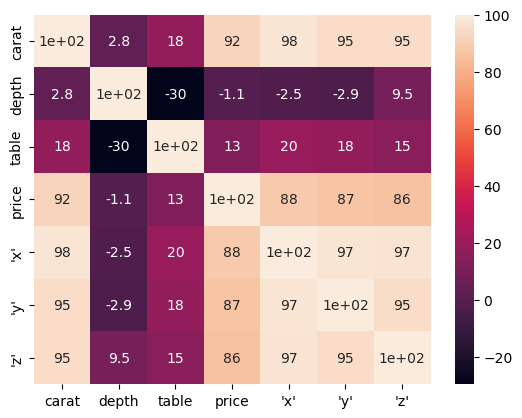

In [13]:
sns.heatmap(((data.corr())*100), annot=True)

In [14]:
#fair sample data example
data[data["carat"]>3]

,carat,cut,color,clarity,depth,table,price,'x','y','z'
19339,3.01,b'Premium',b'I',b'I1',62.7,58.0,8040.0,9.10,8.97,5.67
21758,3.11,b'Fair',b'J',b'I1',65.9,57.0,9823.0,9.15,9.02,5.98
21862,3.01,b'Premium',b'F',b'I1',62.2,56.0,9925.0,9.24,9.13,5.73
22428,3.05,b'Premium',b'E',b'I1',60.9,58.0,10453.0,9.26,9.25,5.66
22540,3.02,b'Fair',b'I',b'I1',65.2,56.0,10577.0,9.11,9.02,5.91
22741,3.01,b'Fair',b'H',b'I1',56.1,62.0,10761.0,9.54,9.38,5.31
23644,3.65,b'Fair',b'H',b'I1',67.1,53.0,11668.0,9.53,9.48,6.38
24131,3.24,b'Premium',b'H',b'I1',62.1,58.0,12300.0,9.44,9.40,5.85
24297,3.22,b'Ideal',b'I',b'I1',62.6,55.0,12545.0,9.49,9.42,5.92
24328,3.50,b'Ideal',b'H',b'I1',62.8,57.0,12587.0,9.65,9.59,6.03


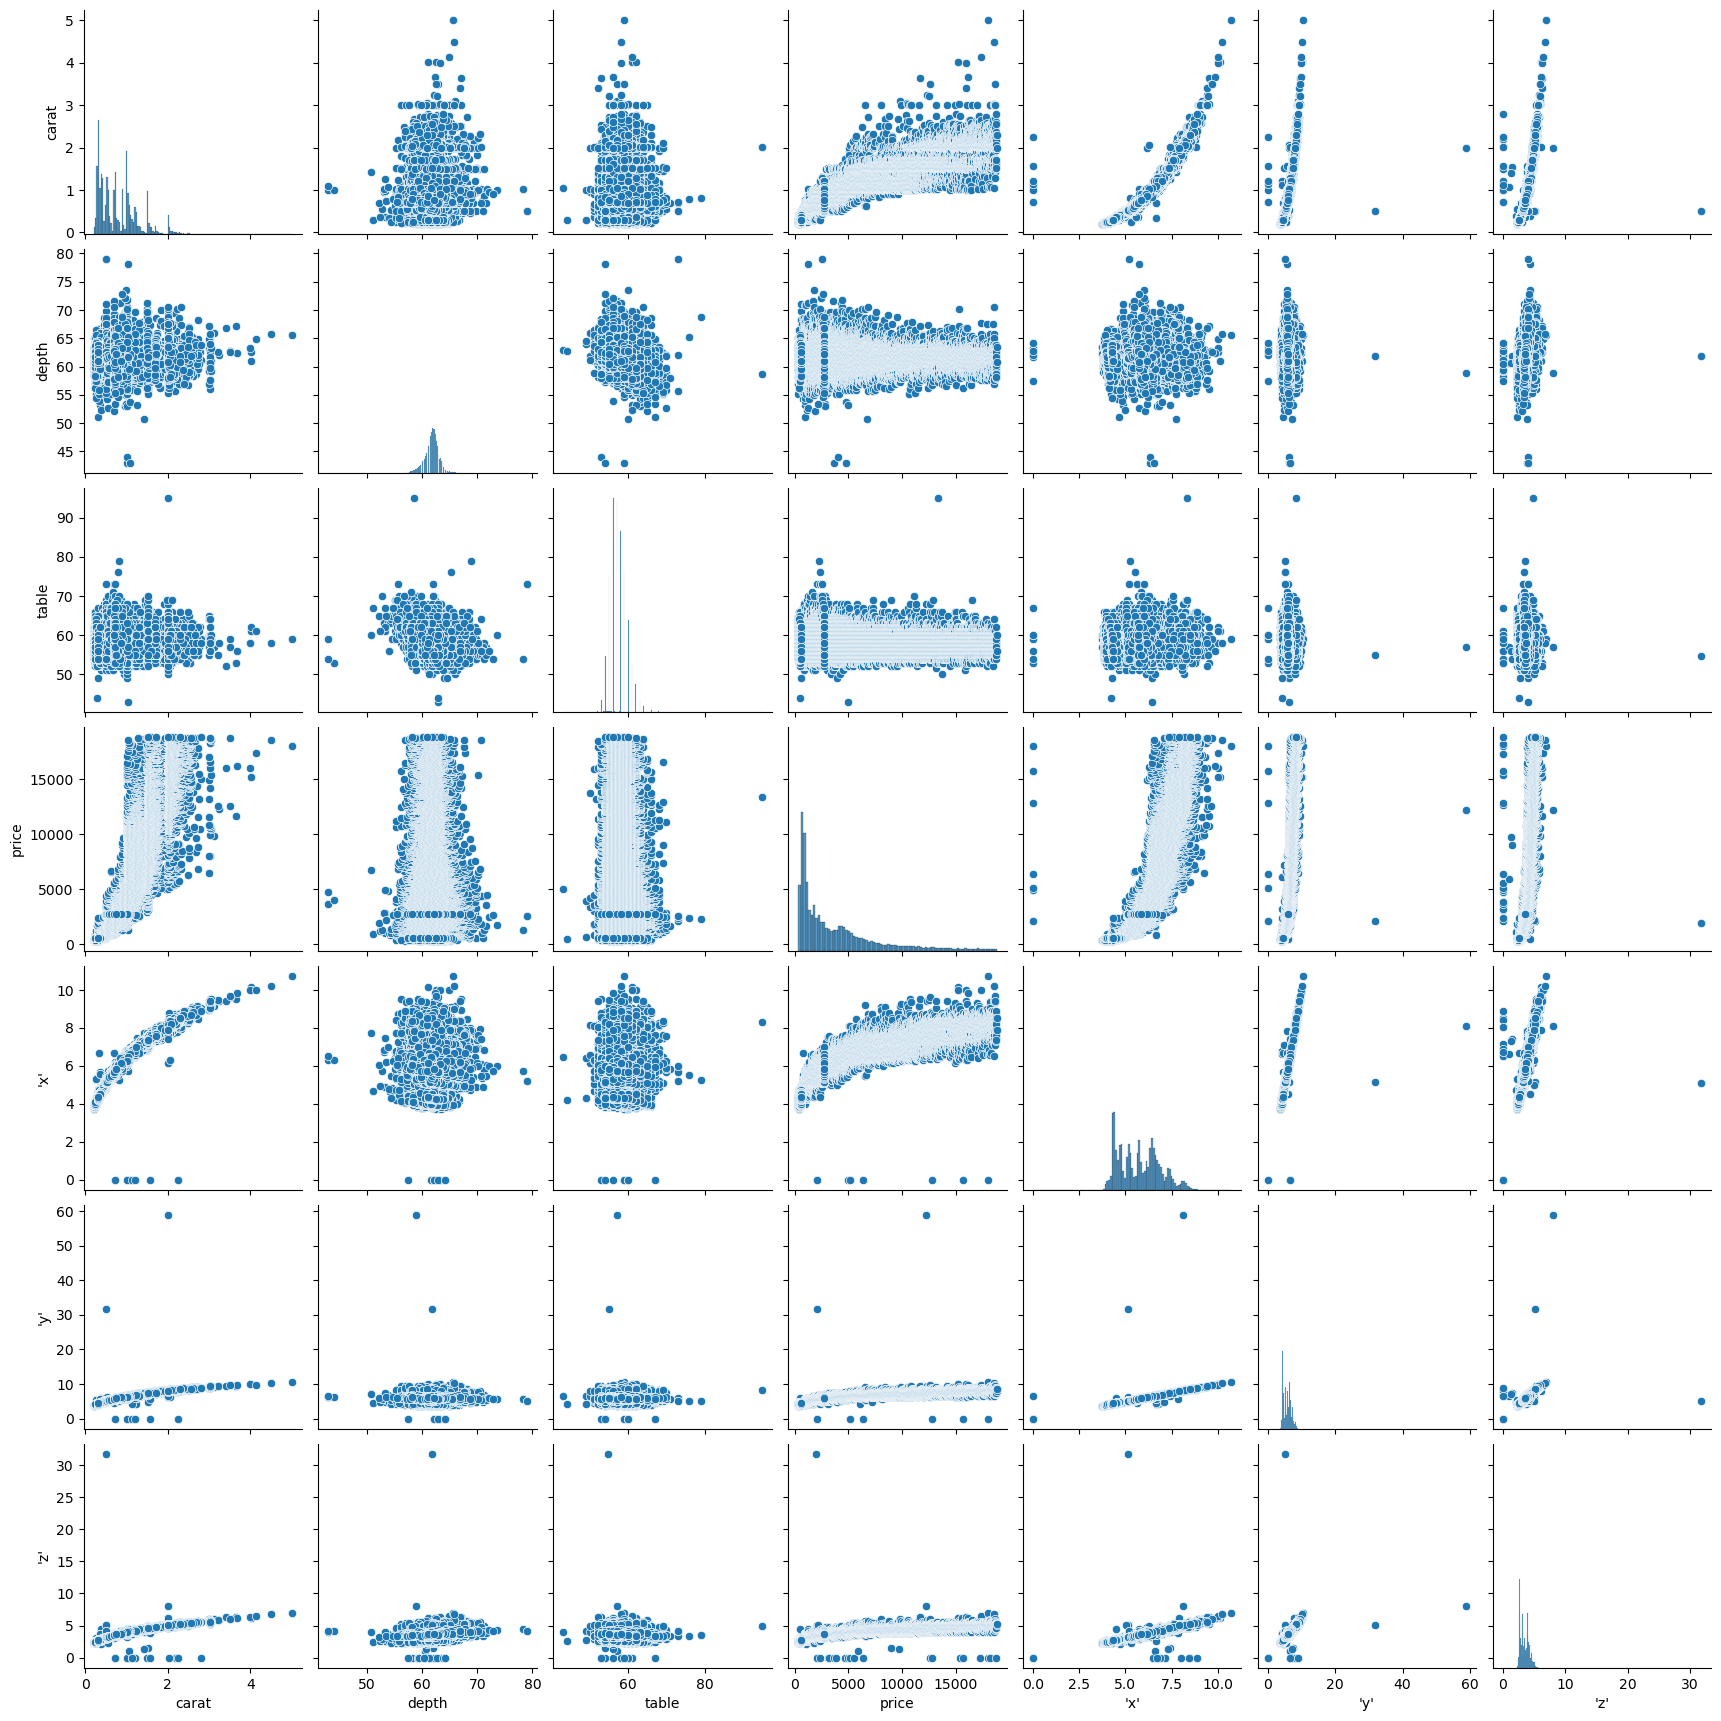

In [16]:
sns.pairplot(data)

<AxesSubplot:xlabel='carat', ylabel='price'>

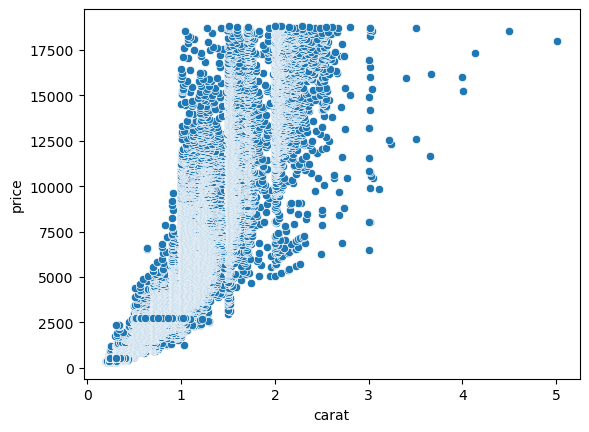

In [17]:
sns.scatterplot(x=data["carat"], y = data["price"])

In [18]:
data[data["carat"] > 3].shape

(32, 10)

<AxesSubplot:xlabel='depth', ylabel='price'>

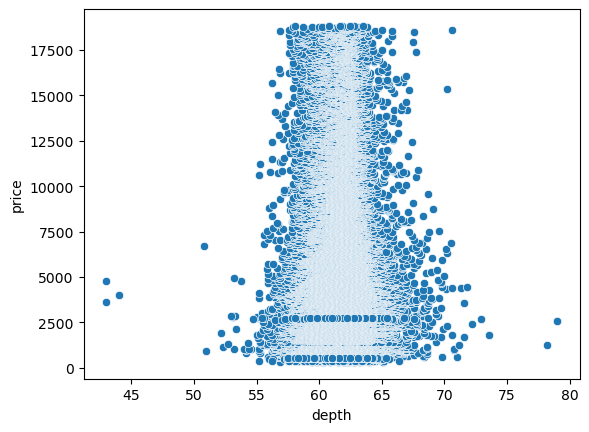

In [19]:
sns.scatterplot(x= data["depth"] , y=data["price"])

In [20]:
data[(data["depth"] > 75) | (data["depth"] < 45 )].shape
#About 6 rows

(6, 10)

<AxesSubplot:xlabel='table', ylabel='price'>

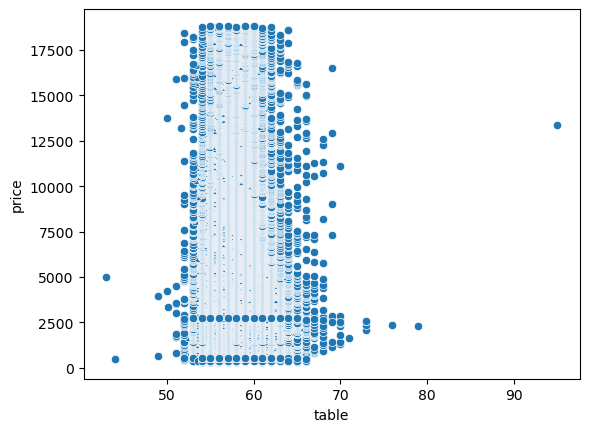

In [21]:
sns.scatterplot(x= data["table"] , y=data["price"])

In [22]:
data[data["table"] > 90].shape
#Only one row

(1, 10)

# work on outliers

In [23]:
carat_index = list(data[data["carat"] >= 3].index)
#x_index = list(data[data["x"] < 2 ].index)
#y_index = list(data[data["y"] > 30 ].index)
#z_index = list(data[data["z"] > 30 ].index)
depth_index = list(data[(data["depth"] > 75) | (data["depth"] < 45 )].index)
table_index = list(data[data["table"] > 90].index)

indexes = carat_index + depth_index + table_index #+ x_index + y_index + z_index
len(indexes)

47

In [24]:
print("DataFrame shape before delete outliers is. ", data.shape)
for outlier in indexes:
    data.drop(outlier, inplace=True)
print("DataFrame shape after deleting outliers. ",data.shape)

DataFrame shape before delete outliers is.  (53940, 10)
DataFrame shape after deleting outliers.  (53893, 10)


# Categorical data

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cut', ylabel='count'>

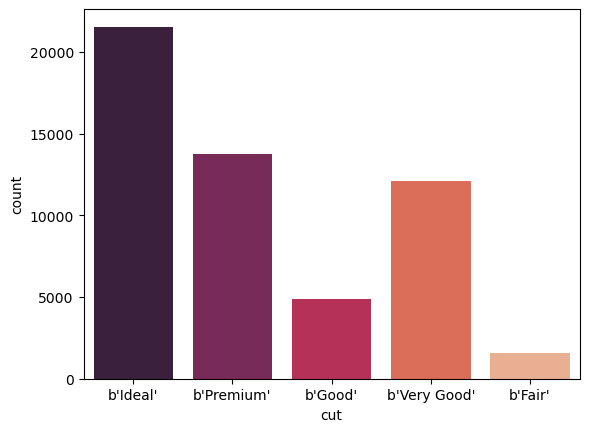

In [25]:
sns.countplot(data["cut"], palette='rocket')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='count'>

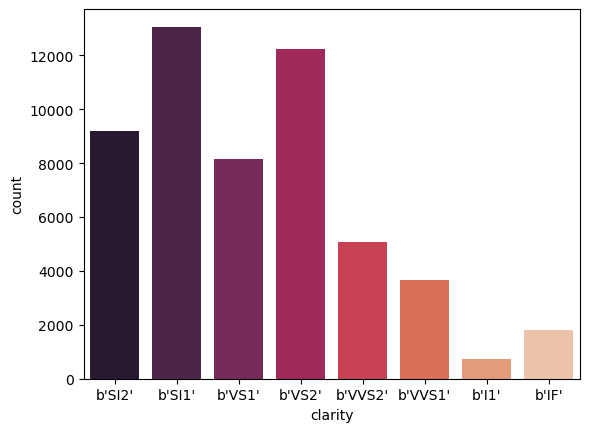

In [26]:
sns.countplot(data["clarity"], palette='rocket')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

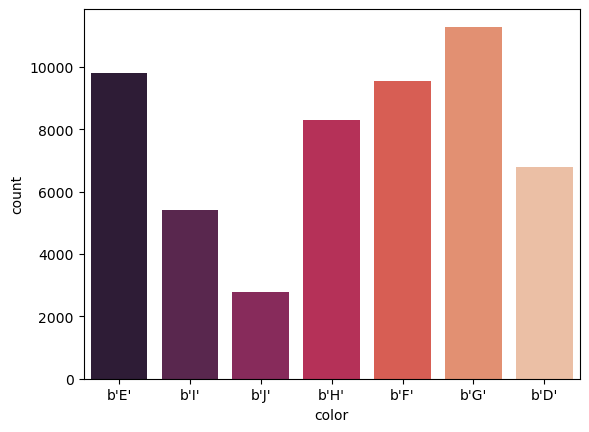

In [27]:
sns.countplot(data["color"], palette='rocket')

In [28]:
# Make copy to avoid changing original data 
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75


In [30]:
from sklearn.model_selection import train_test_split

X = label_data.drop(["price"], axis = 1)
y = label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=20)

#print all shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40419, 9)
(13474, 9)
(40419,)
(13474,)


In [31]:
from sklearn.tree import DecisionTreeRegressor

modelpred = DecisionTreeRegressor(max_depth = 21,random_state=400)
modelpred.fit(X_train, y_train)
y_pred = modelpred.predict(X_test)
#Model score
print("Model train accuracy score is :", modelpred.score(X_train, y_train))
print("Model test accuracy score is :", modelpred.score(X_test, y_test))

Model train accuracy score is : 0.9993395742582297
Model test accuracy score is : 0.9659199157219325


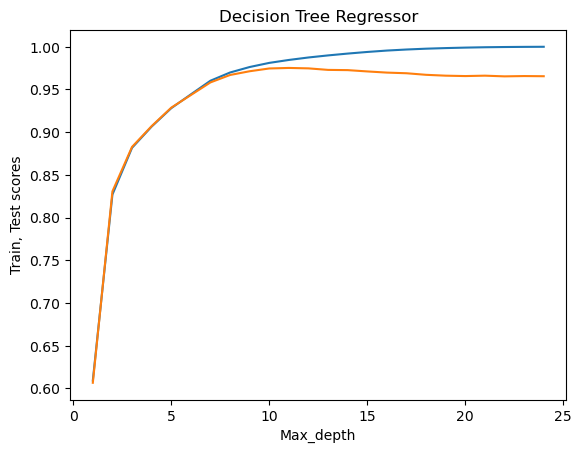

In [32]:
depths = [i for i in range(1, 25)]
train_score = []
test_score = []

for i in depths:
    DTR = DecisionTreeRegressor(max_depth = i)
    DTR.fit(X_train, y_train)
    train_score.append(DTR.score(X_train, y_train))
    test_score.append(DTR.score(X_test, y_test))
    
plt.plot(depths, train_score, label="Training")
plt.plot(depths, test_score, label="Testing")
plt.xlabel("Max_depth")
plt.ylabel("Train, Test scores")
plt.title("Decision Tree Regressor")
plt.show()

In [33]:
#from sklearn.metrics import r2_score, mean_squared_error

#print("R2_Score is: ", r2_score(y_test, y_pred).round(4))

R2_Score is:  0.9659


In [41]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the diamonds dataset
diamonds = pd.read_csv('diamonds.csv')

# Drop non-numeric columns
diamonds = diamonds.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
diamonds_scaled = scaler.fit_transform(diamonds)

# Perform PCA with 3 components
pca = PCA(n_components=3)
diamonds_pca = pca.fit_transform(diamonds_scaled)

# Create a new DataFrame with the PCA results
diamonds_pca_df = pd.DataFrame(data=diamonds_pca, columns=['PC1', 'PC2', 'PC3'])

# Print the explained variance ratio for each component
print(pca.explained_variance_ratio_)


[0.68055926 0.18369544 0.09868732]
